## Séries Temporais

### Complete guide to Time Series Forecasting (with Codes in Python)
- https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

### How to Check if Time Series Data is Stationary with Python
- https://machinelearningmastery.com/time-series-data-stationary-python/

### How to Create an ARIMA Model for Time Series Forecasting in Python
- https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

### Time Series Forecasting - ARIMA models - Towards Data Science
- https://towardsdatascience.com/time-series-forecasting-arima-models-7f221e9eee06

### ARIMA Model – Complete Guide to Time Series Forecasting in Python
- https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

In [1]:
# importar pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
#import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [10]:
# carregar arquivo de dados de treino
data = pd.read_csv('weather-train.csv', index_col='date', parse_dates=['date'])

data = data.dropna()
#data = data['2015-01':'2015-12']
#data = data['2013-01':'2014-12']
#data = data['2013-01':'2015-12']
#data['temperature'] += 273.15

print("Data Types:\n", data.dtypes)
print("\nIndex:\n", data.index)
data.head()

Data Types:
 temperature    float64
dtype: object

Index:
 DatetimeIndex(['2012-10-01', '2012-10-02', '2012-10-03', '2012-10-04',
               '2012-10-05', '2012-10-06', '2012-10-07', '2012-10-08',
               '2012-10-09', '2012-10-10',
               ...
               '2016-11-07', '2016-11-08', '2016-11-09', '2016-11-10',
               '2016-11-11', '2016-11-12', '2016-11-13', '2016-11-14',
               '2016-11-15', '2016-11-16'],
              dtype='datetime64[ns]', name='date', length=1507, freq=None)


,temperature
date,
2012-10-01,11.036840
2012-10-02,14.340558
2012-10-03,14.518382
2012-10-04,16.820351
2012-10-05,16.948431


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1507 entries, 2012-10-01 to 2016-11-16
Data columns (total 1 columns):
temperature    1507 non-null float64
dtypes: float64(1)
memory usage: 23.5 KB


In [12]:
data.describe()

,temperature
count,1507.000000
mean,12.685589
std,11.516132
min,-20.568680
25%,3.949332
50%,13.665819
75%,22.204917
max,35.738109


In [13]:
ts = data['temperature']

ts.head()

date
2012-10-01    11.036840
2012-10-02    14.340558
2012-10-03    14.518382
2012-10-04    16.820351
2012-10-05    16.948431
Name: temperature, dtype: float64

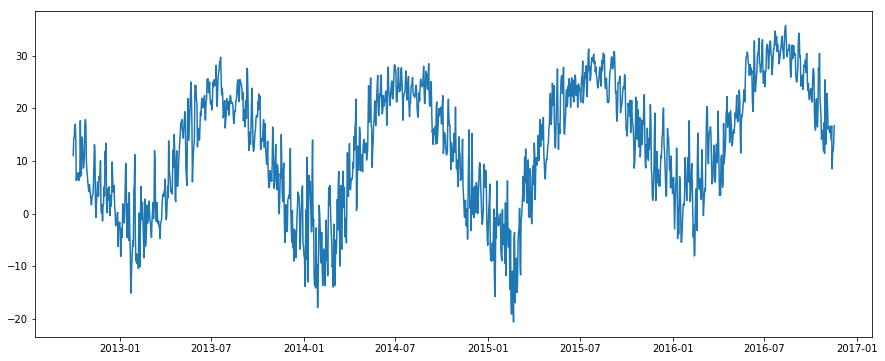

In [14]:
plt.plot(ts)

In [ ]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    window = 365
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()
    #rolmean = pd.rolling_mean(timeseries, window=12)
    #rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts)
    dfoutput = pd.Series(dftest[0:4], index=[
        'Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [ ]:
test_stationarity(ts)

In [ ]:
# Estimating & Eliminating Trend
ts_log = np.log(ts)
ts_log.head()

In [ ]:
plt.plot(ts_log)

In [ ]:
# Moving average
moving_avg = ts_log.rolling(7).mean()
#moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [ ]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(10)

In [ ]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

In [ ]:
# exponentially weighted moving average (EWMA)

expwighted_avg = ts_log.to_frame().ewm(halflife=7).mean()
#expwighted_avg = pd.ewma(ts_log, halflife=12)
expwighted_avg = expwighted_avg['temperature']

plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

In [ ]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

## Eliminating Trend and Seasonality

### Differencing

In [ ]:
ts_log_diff = ts_log - ts_log.shift(-7)
#ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

In [ ]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

### Decomposing

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_log.dropna(), freq=365)
#decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

## Forecasting a Time Series

In [ ]:
#ACF and PACF plots
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=15)
lag_pacf = pacf(ts_log_diff, nlags=15, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ts_log)

In [ ]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ts_log)
pyplot.show()

In [ ]:
# load the ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
# AR Model
model = ARIMA(ts_log, order=(2, 1, 0))
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_AR.fittedvalues - ts_log_diff) ** 2))

In [ ]:
# MA Model
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_MA.fittedvalues - ts_log_diff) ** 2))

In [ ]:
# Combined Model
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues - ts_log_diff) ** 2))

In [ ]:
# Taking it back to original scale
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

In [ ]:
ts_log.head()

In [ ]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
#predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts - 273.15)
plt.plot(predictions_ARIMA - 273.15)
plt.title('RMSE: %.4f' % np.sqrt(sum((predictions_ARIMA - ts) ** 2) / len(ts)))

In [ ]:
test_dates = pd.date_range(start='2016-11-17', end='2017-11-29', freq='D')
test_dates

In [ ]:
test_data = pd.DataFrame(test_dates, columns=['ds'])
test_data.info()
test_data.head()

In [ ]:
forecast = model.predict(test_data)
forecast[['ds', 'yhat']].tail()

In [ ]:
submission = pd.DataFrame({
    'date': forecast['ds'],
    'temperature': forecast['yhat']
})
submission.set_index('date', inplace=True)
submission.info()
submission.head()
submission.to_csv('weather-submission.csv')

In [ ]:
def rmsle(y_pred, y_test): 
    assert len(y_test) == len(y_pred)
    return np.sqrt(np.mean((np.log(1 + y_pred) - np.log(1 + y_test)) ** 2))

In [ ]:
rmsle(data3.yhat + 273.15, data3.y + 273.15)

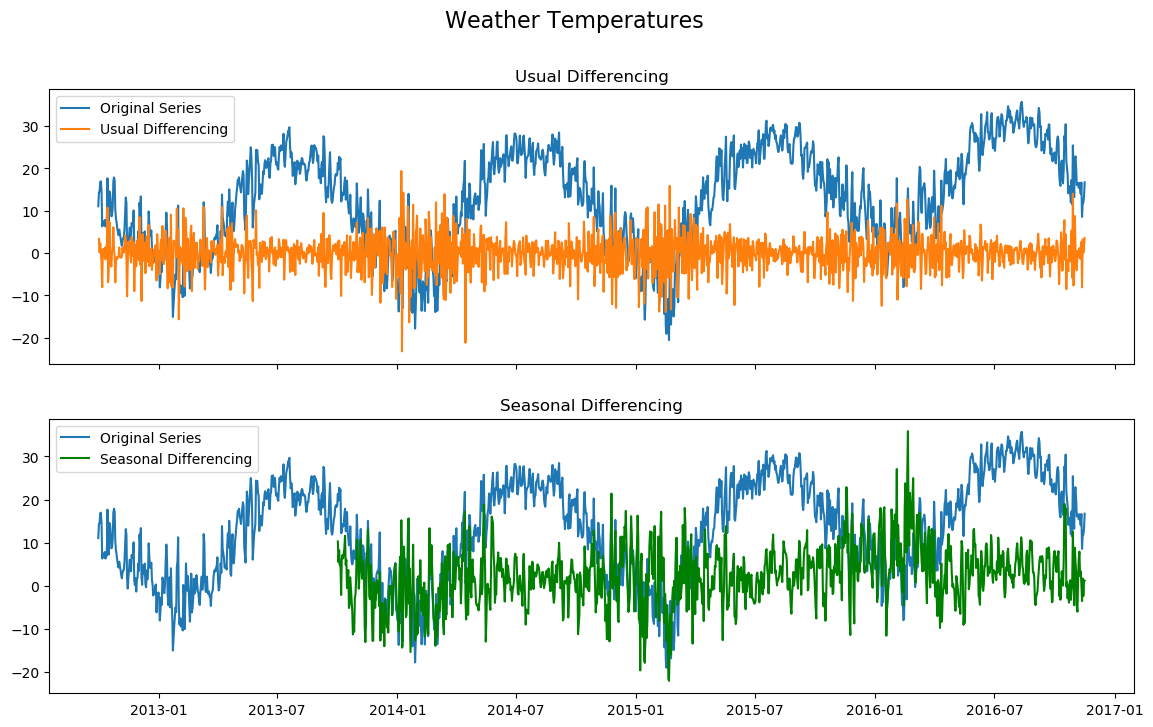

In [27]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(14,8), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(ts, label='Original Series')
axes[0].plot(ts.diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)

# Seasinal Dei
axes[1].plot(ts, label='Original Series')
axes[1].plot(ts.diff(365), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Weather Temperatures', fontsize=16)
plt.show()

In [28]:
from pmdarima import auto_arima

# Seasonal - fit stepwise auto-ARIMA
smodel = auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=365,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 365); AIC=nan, BIC=nan, Fit time=nan seconds


MemoryError: 

In [ ]:
# Forecast
n_periods = 365 # 1 ano
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Weather Temperatures")
plt.show()